In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [1]:
%matplotlib inline

In [3]:
model = tree.DecisionTreeClassifier(criterion="entropy", max_depth=2)

In [4]:
df = pd.read_csv("titanic.csv")
df = df.drop("Name", axis="columns")
df.head()

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [5]:
sex_encoder = LabelEncoder()

In [6]:
df["Sex"] = sex_encoder.fit_transform(df["Sex"])

In [7]:
target = df["Survived"]
data = df.drop("Survived", axis="columns")

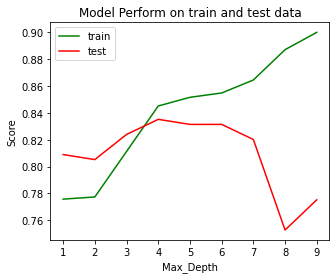

In [17]:
x = list(range(1,100))
train = np.array([])
test = np.array([])
for i in x:
    X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.3, random_state=43)
    model = tree.DecisionTreeClassifier(criterion="entropy", max_depth=i)
    model.fit(X_train, y_train)
    
    train = np.append(train, model.score(X_train, y_train))
    test = np.append(test, model.score(X_test, y_test))

    
perform_df = pd.DataFrame({"x":x, "train":train, "test":test})   

fig = plt.figure(figsize=(5,4))
ax = fig.gca()
ax.set_title("Model Perform on train and test data")
ax.set_ylabel("Score")
ax.set_xlabel("Max_Depth")
plt.plot("x", "train", data=perform_df, color="green")
plt.plot("x", "test", data=perform_df, color="red")
plt.legend()
plt.show()

In [18]:
# Best score obtain for depth 4
model = tree.DecisionTreeClassifier(criterion="entropy", max_depth=4)
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [9]:
d = {k:v for k,v in zip(x,test)}
sorted(d.items(), key=lambda i: i[1], reverse=True)

[(4, 0.8352059925093633),
 (5, 0.8314606741573034),
 (6, 0.8314606741573034),
 (3, 0.8239700374531835),
 (7, 0.8202247191011236),
 (1, 0.8089887640449438),
 (2, 0.8052434456928839),
 (16, 0.7790262172284644),
 (49, 0.7790262172284644),
 (99, 0.7790262172284644),
 (9, 0.7752808988764045),
 (19, 0.7715355805243446),
 (23, 0.7715355805243446),
 (34, 0.7715355805243446),
 (80, 0.7715355805243446),
 (33, 0.7677902621722846),
 (40, 0.7677902621722846),
 (47, 0.7677902621722846),
 (61, 0.7677902621722846),
 (62, 0.7677902621722846),
 (14, 0.7640449438202247),
 (17, 0.7640449438202247),
 (18, 0.7640449438202247),
 (26, 0.7640449438202247),
 (27, 0.7640449438202247),
 (53, 0.7640449438202247),
 (77, 0.7640449438202247),
 (82, 0.7640449438202247),
 (86, 0.7640449438202247),
 (87, 0.7640449438202247),
 (94, 0.7640449438202247),
 (97, 0.7640449438202247),
 (8, 0.7602996254681648),
 (12, 0.7602996254681648),
 (13, 0.7602996254681648),
 (15, 0.7602996254681648),
 (22, 0.7602996254681648),
 (24, 0.76

In [10]:
data.head()

,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,3,1,22.0,1,0,7.2500
1,1,0,38.0,1,0,71.2833
2,3,0,26.0,0,0,7.9250
3,1,0,35.0,1,0,53.1000
4,3,1,35.0,0,0,8.0500


In [20]:
# Sample data to make a prediction
s = np.array([3,1,25.0,0,1,7.25])
# Reshape the data into a 2d array
s = s.reshape(1, -1)

model.predict(s)

array([0], dtype=int64)